Perform k- means clustering algorithm for customer segmentation from given features. Utilize Euclidean distance and Manhattan distance for this problem. Also, plot in terms of 2D and 3D clusters this problem.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv("Cust_Segmentation.csv")

df_processed = df.drop('Customer Id', axis=1)

imputer = SimpleImputer(strategy='most_frequent')
df_processed['Defaulted'] = imputer.fit_transform(df_processed[['Defaulted']])
df_processed['Defaulted'] = df_processed['Defaulted'].astype(int)

df_processed = pd.get_dummies(df_processed, columns=['Address'], drop_first=True)

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_processed)

In [5]:
chosen_k = 4
kmeans = KMeans(n_clusters=chosen_k, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [6]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = y_kmeans

2D plot saved as 'kmeans_2d_plot.png'


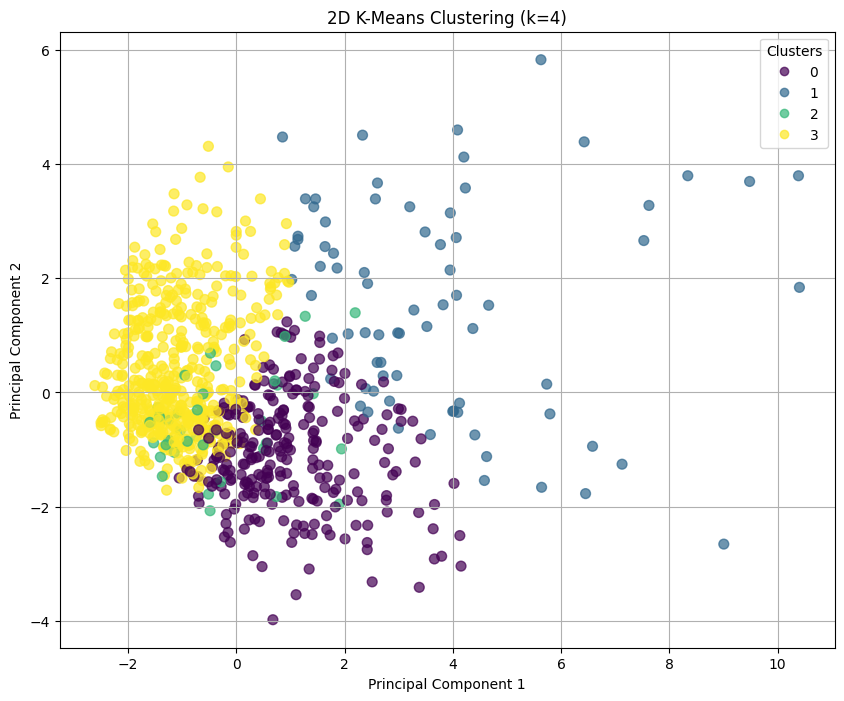

In [7]:
plt.figure(figsize=(10, 8))
scatter_2d = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', s=50, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'2D K-Means Clustering (k={chosen_k})')
plt.legend(*scatter_2d.legend_elements(), title='Clusters')
plt.grid(True)
plt.savefig('kmeans_2d_plot.png')
print("2D plot saved as 'kmeans_2d_plot.png'")

3D plot saved as 'kmeans_3d_plot.png'


<Figure size 640x480 with 0 Axes>

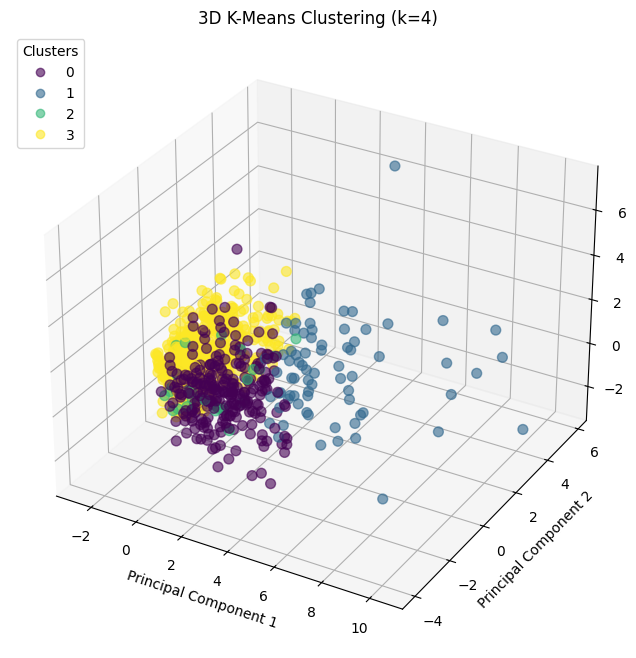

In [8]:
plt.clf()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter_3d = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['Cluster'], cmap='viridis', s=50, alpha=0.6)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title(f'3D K-Means Clustering (k={chosen_k})')
plt.legend(*scatter_3d.legend_elements(), title='Clusters', loc='upper left')

plt.savefig('kmeans_3d_plot.png')
print("3D plot saved as 'kmeans_3d_plot.png'")